<font size=5>Machine Learning Model Diagnostics and Validation</font>

Updated on July 22, 2022

This demo (based on BikeSharing data, a regression task) covers: 

- Accuracy, WeakSpot and Overfit

- Reliability Testing

- Robustness and Resilience Testing

- Model Comparison and Benchmarking

# Install PiML Toolbox

- Run `!pip install piml` to install the latest version of PiML.
- In Google Colab, we need restart the runtime in order to use newly installed version.

In [ ]:
!pip install PiML

In [1]:
!pip show PiML

Name: PiML
Version: 0.2.2
Summary: A low-code interpretable machine learning toolbox in Python.
Home-page: https://github.com/SelfExplainML/PiML-Toolbox
Author: Sudjianto, Agus and Zhang, Aijun and Yang, Zebin and Su, Yu and Zeng, Ningzhou and Nair, Vijay
Author-email: None
License: Apache
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, shap, pandas, ipywidgets, opendatasets, xgboost, pygam, statsmodels, lightgbm, PyALE, ipython, seaborn, torch, joblib, scipy, lime, scikit-learn, matplotlib, xlrd
Required-by: 


# Load and Prepare Data

- Initilaize a new experiment by `piml.Experiment()`
- Low-code interactive interface, or
- High-code autorun scripts (optional)  

In [2]:
from piml import Experiment
exp = Experiment()

## Low-code Interface

In [ ]:
# Choose BikeSharing
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# Exclude these features one-by-one: "season", "workingday", "atemp" (highly correlated with others)
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [ ]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## High-code Scripts (optional)

In [3]:
exp.data_loader(data='BikeSharing')

exp.data_summary(feature_type={}, feature_exclude=["season", "workingday", "atemp"])

exp.data_prepare(target='cnt', task_type='Regression', test_ratio=0.2, random_state=0)

exp.eda(show='all', uni_feature='temp', bi_features=['hr', 'cnt'],  multi_type='correlation_heatmap')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,61.0


HTML(value='Data Shape:(17379, 13)')

,0,1
0,Inactive columns name,"[season, workingday, atemp]"
1,Target colunm name,cnt
2,Task type,Regression
3,Test ratio,0.2
4,Random state,0


<IPython.core.display.Javascript object>

# Train Black-Box Models 

e.g. XGBoost (depth 7)

In [4]:
from xgboost import XGBRegressor

clf = XGBRegressor(n_estimators=500, max_depth=7)
pipeline = exp.make_pipeline(clf)
pipeline.fit()
exp.register(pipeline=pipeline, name='XGBoost7')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register XGBoost7 Done</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

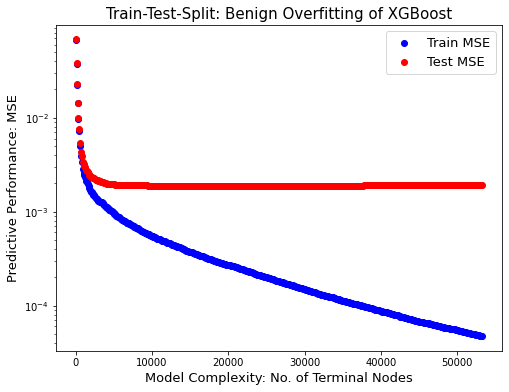

In [5]:
# Benign Overftting under train-test-split framework

import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from sklearn.metrics import mean_squared_error

train_x, train_y = exp.get_model("XGBoost7").get_data(train=True)
test_x, test_y = exp.get_model("XGBoost7").get_data(test=True)

def score(clf, iteration_range):
    train_mse = mean_squared_error(train_y, clf.predict(train_x, iteration_range=iteration_range))
    test_mse = mean_squared_error(test_y, clf.predict(test_x, iteration_range=iteration_range))
    tree_idx = np.logical_and(xgbinfo["Tree"] < iteration_range[1], xgbinfo["Tree"] >= iteration_range[0])
    n_leaves = np.sum(xgbinfo[tree_idx].loc[:, ["Feature"]].values == "Leaf")
    return {'n_leaves': n_leaves, 'train_mse': train_mse, 'test_mse': test_mse}

all_metrics = []
xgbinfo = clf.get_booster().trees_to_dataframe()
n_iter = 500
for i in range(n_iter):
    metrics = score(clf, (0, i + 1))
    all_metrics.append(metrics)
all_resluts = pd.DataFrame(all_metrics)

plt.figure(figsize=(8,6))
plt.scatter(all_resluts["n_leaves"], all_resluts["train_mse"], color="blue", label="Train MSE")
plt.scatter(all_resluts["n_leaves"], all_resluts["test_mse"], color="red", label="Test MSE")
plt.legend(fontsize=13)
plt.yscale("log")
plt.ylabel("Predictive Performance: MSE", fontsize=13)
plt.xlabel("Model Complexity: No. of Terminal Nodes", fontsize=13)
plt.title("Train-Test-Split: Benign Overfitting of XGBoost", fontsize=15)
plt.show()

In [6]:
# Choose XGBoost7, check Overfit
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Train Intepretable Models


In [7]:
# ----------------------------------
# Low-code Interface
# ----------------------------------

# Choose EBM, GAMI-Net, ReLU-DNN (default) and Sparse-ReLU-DNN (L1=0.0005)
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [8]:
# ----------------------------------
# High-code Scripts (optional)
# ----------------------------------

# EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingRegressor

clf = ExplainableBoostingRegressor(interactions=10, random_state=0)
exp.model_train(model=clf, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_result')

# GAMI-Net: GAMI Neural Networks by WF CMoR
from piml.models import GAMINetRegressor

clf = GAMINetRegressor(interact_num=10, 
                       subnet_size_main_effect=[20], 
                       subnet_size_interaction=[20, 20])
exp.model_train(model=clf, name='GAMI-Net')
exp.model_diagnose(model="GAMI-Net", show='accuracy_result')

# ReLU-DNN: ReLU Deep Neural Networks (default parameters)
from piml.models import ReluDNNRegressor

clf = ReluDNNRegressor(hidden_layer_sizes=(40, 40), l1_reg=1e-05,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_result')

# Sparse-ReLU-DNN: set L1-Regularization to be 0.005
clf = ReluDNNRegressor(hidden_layer_sizes=(40, 40), l1_reg=0.0005,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf, name='Sparse-ReLU-DNN')
exp.model_diagnose(model="Sparse-ReLU-DNN", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register EBM Done</p>")

,,MSE,MAE,R2
0,Train,0.006317,0.055269,0.816823
1,Test,0.006871,0.057656,0.804265
2,Gap,0.000554,0.002387,-0.012558


HTML(value="<p class='notification info'>Register GAMI-Net Done</p>")

,,MSE,MAE,R2
0,Train,0.003238,0.039444,0.906110
1,Test,0.003597,0.041875,0.897519
2,Gap,0.000360,0.002431,-0.008591


HTML(value="<p class='notification info'>Register ReLU-DNN Done</p>")

,,MSE,MAE,R2
0,Train,0.003915,0.043008,0.886470
1,Test,0.004556,0.046019,0.870214
2,Gap,0.000641,0.003011,-0.016256


HTML(value="<p class='notification info'>Register Sparse-ReLU-DNN Done</p>")

,,MSE,MAE,R2
0,Train,0.015368,0.090600,0.554361
1,Test,0.015395,0.089218,0.561412
2,Gap,0.000028,-0.001382,0.007052


# Interpret/Explain

In [9]:
# Choose EBM, GAMI-Net, ReLU-DNN or Sparse-ReLU-DNN
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [10]:
# Choose EBM, GAMI-Net, ReLU-DNN or Sparse-ReLU-DNN, as well as arbitrary black-box models upon registration
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Diagnose/Compare

In [11]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [12]:
# Compare EBM, GAMI-Net and XGBoost7
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>